In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_feature_matrix(N = 55):
    
    #initialize the feature vector with zeros. 
    x_vec = np.zeros((N,3))

    x = []
    ## Loop through each picture and each pixel and sum the RGB values into the feature vector matrix.
    ## At last, remember to divide each R, G and B sum with the total pixel count to get the average value.
    ## Hint: Most of the commands required for this task are in the 2.Dataset-section.
    # Read in an image from a jpg-file and store it in the variable im   
    for i in range(N):
        im = Image.open("images/image_" + str(i+1)+".jpg")
        # Determine the size of the image
        width, height = im.size;
        # Convert the image to RGB
        rgb_im = im.convert('RGB');
        # Determine the rgb values of the pixel at location (row,col) where both row and col are 0
        for j in range (width):
            for k in range (height):
                pixel = rgb_im.getpixel((j,k))
                for l in range(3):
                    x_vec[i,l] += pixel[l]
        x_vec[i] = x_vec[i]/(width*height)
    
    return x_vec;

def get_labels():
    """
    0 to 19: Grass (class 1)
    20 to 39: Soil (class 2)
    40 to 55: Tiles (class 3)
    """
    return np.array([0 if i in range(20) else 1 if i in range(20,40) else 2 for i in range(55)])

import os
if not os.path.isfile('feature.csv'):
    print('generating features')
    X = get_feature_matrix()
    y = get_labels()
    df = pd.DataFrame(X, columns=['red', 'green', 'blue'])
    df['class'] = y
    df.to_csv('feature.csv', index=False)
else:
    df = pd.read_csv('feature.csv')

In [3]:
df.head()

,red,green,blue,class
0,137.601168,164.151861,76.379085,0
1,87.610809,135.854727,41.928933,0
2,66.430575,154.891591,40.473052,0
3,79.411056,121.858225,51.353796,0
4,147.551549,173.542708,99.561643,0


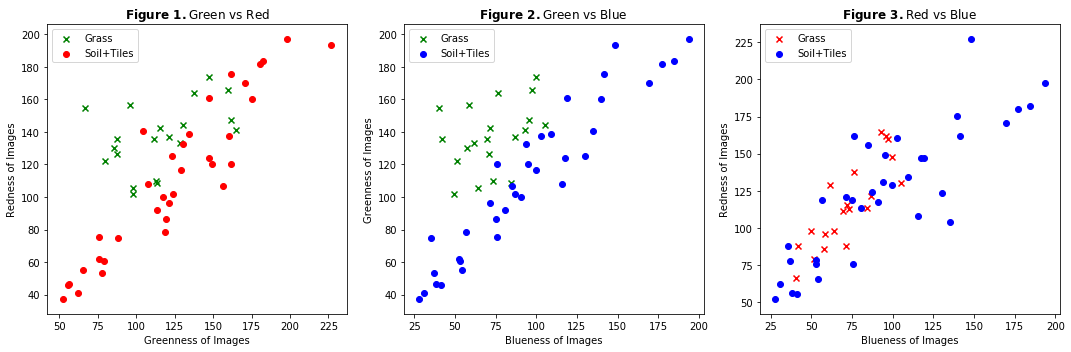

In [4]:
# Set figure size (width, height)
fig, axes = plt.subplots(1, 3,figsize=(15, 5))

# PLOT GREENNESS AGAINST REDNESS
#Make a scatterplot of the average greenness vs redness. 
#Indicate Grass images by a cross, and others by a dot.
grass = df[df['class'] == 0]
others = df[df['class'] != 0]

axes[0].scatter(grass['red'], grass['green'], c='g', marker ='x', label='Grass')
axes[0].scatter(others['red'], others['green'], c='r', marker ='o', label='Soil+Tiles')

axes[0].set_xlabel('Greenness of Images')
axes[0].set_ylabel('Redness of Images')
axes[0].legend()
axes[0].set_title(r'$\bf{Figure\ 1.}$Green vs Red')

# PLOT GREENNESS AGAINST BLUENESS
#The same as above but now greenness vs blueness.
axes[1].scatter(grass['blue'], grass['green'], c='g', marker ='x', label='Grass')
axes[1].scatter(others['blue'], others['green'],c='b', marker ='o', label='Soil+Tiles')
axes[1].set_xlabel('Blueness of Images')
axes[1].set_ylabel('Greenness of Images')
axes[1].legend()
axes[1].set_title(r'$\bf{Figure\ 2.}$Green vs Blue')

# PLOT REDNESS AGAINST BLUENESS
#The same as above but now redness vs blueness.
axes[2].scatter(grass['blue'], grass['red'], c='r', marker ='x', label='Grass')
axes[2].scatter(others['blue'], others['red'], c='b', marker ='o', label='Soil+Tiles')
axes[2].set_xlabel('Blueness of Images')
axes[2].set_ylabel('Redness of Images')
axes[2].legend()
axes[2].set_title(r'$\bf{Figure\ 3.}$Red vs Blue')
plt.tight_layout()

In [6]:
df.loc[:, df.columns!='class'] = df.loc[:, df.columns!='class']/255

In [7]:
df.head()

,red,green,blue,class
0,0.539612,0.643733,0.299526,0
1,0.343572,0.532764,0.164427,0
2,0.260512,0.607418,0.158718,0
3,0.311416,0.477875,0.201387,0
4,0.578634,0.680560,0.390438,0


In [58]:
for colour in df.columns:
    if colour != 'class':
        df[colour] = df[colour].apply(lambda x: (x-df[colour].min())/(df[colour].max()-df[colour].min()))
        
df.head()

,red,green,blue,class
0,0.488557,0.793989,0.293286,0
1,0.202410,0.617048,0.085682,0
2,0.081173,0.736085,0.076909,0
3,0.155474,0.529529,0.142478,0
4,0.545513,0.852710,0.432988,0


In [67]:
def sigmoid_func(z):
    return 1/(1+np.exp(-z))

def gradient(X,y,w):
    N, d = X.shape
    grad=np.zeros((1,d))
    for i in range(N):
        grad=grad+(sigmoid_func(np.dot(X[i,:],np.transpose(w)))-y[i])*X[i,:]
        
    grad=np.dot(1/55,grad)
    return grad

def logisticRegression_func(X,y,step_size, K=2000):
    """
    K: no. of iteration
    """
    N, d = X.shape
    # Initialize w as 1xd array.
    w = np.zeros((1,d))
    loss = float('inf')
    loss_list = []
    for i in range(K):
        grad=gradient(X,y,w)
        w = w-step_size * grad
        l = sigmoid_func(np.dot(X,np.transpose(w)))
        loss = -np.dot(np.squeeze(np.asarray(y)),np.log(l))-np.dot(1-np.squeeze(np.asarray(y)),np.log(1-l))
        loss_list.append(loss/N)
    return loss_list, w

def predict_output(X,w):
    N = X.shape[0]
    y_pred = np.zeros(N)
    for i in range(N):
        if sigmoid_func(np.dot(X[i,:],np.transpose(w))) >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

def get_labels_k(y, k):
    """
    Generate the label vector which has value 1 
    for the pictures of the category we are currently looking at (indicated by k) 
    and 0 for all other categories. 
    """
    return np.array([1 if label == k else 0 for label in y])

In [68]:
X = df.loc[:, df.columns != 'class'].values
y = df['class']
y_prime = get_labels_k(y, 0)
print(y_prime)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 864x288 with 0 Axes>

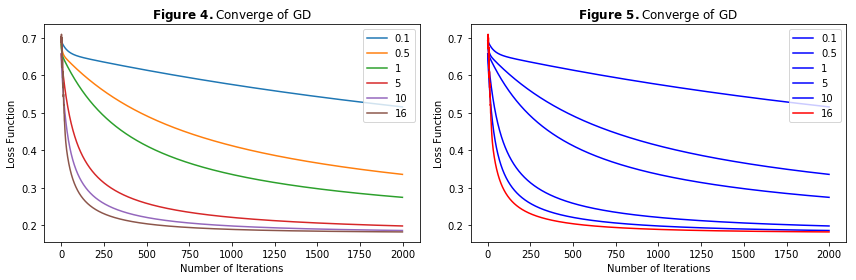

In [11]:
def visualize_error(X, y, step_sizes, best = None, num_iter = 2000):
    plt.figure(figsize=(12, 4))
    fig, axes = plt.subplots(1, 2,figsize=(12, 4))
    for step in step_sizes:
        loss_list, w_opt=logisticRegression_func(X,y,step, num_iter)
        n = len(loss_list) # Size of list remains the same.
        x_axes = np.linspace(0,n,n,endpoint=False)
        axes[0].plot(x_axes, loss_list, label=step)
    axes[0].set_xlabel('Number of Iterations')
    axes[0].set_ylabel('Loss Function')
    axes[0].legend()
    axes[0].set_title(r'$\bf{Figure\ 4.}$Converge of GD')
    
    for step in step_sizes:

        loss_list, w_opt=logisticRegression_func(X,y,step, num_iter)
        
        n = len(loss_list) # Size of list remains the same.
        x_axes = np.linspace(0,n,n,endpoint=False)
        if step == best:
            axes[1].plot(x_axes, loss_list, label=step, color="red")
        else:
            axes[1].plot(x_axes, loss_list, label=step, color="blue")
    
    axes[1].set_xlabel('Number of Iterations')
    axes[1].set_ylabel('Loss Function')
    axes[1].legend()
    axes[1].set_title(r'$\bf{Figure\ 5.}$Converge of GD')
    plt.tight_layout()
    return best, axes

# Change best=None into step size from the list that provides the fastest converge. e.g best=1
res0_1, axes = visualize_error(X, y_prime, best=16, step_sizes=[0.1,0.5,1,5,10,16])

In [69]:
weights = []

k = len(np.unique(y)) # no. of classes
N = X.shape[0]

y_predict = np.zeros((N,k))
step_size = 20
num_iter = 3000
for i in range(k):
    y_prime = get_labels_k(y, i)
    loss_list, w = logisticRegression_func(X, y_prime, step_size, num_iter)
    y_predict[:,i] = predict_output(X, w)
    
    weights.append(w)

In [70]:
def final_class(row):
    classes = np.where(row == 1)[0]
    if classes.size == 0:
        return 0
    else:
        return classes[0]

predictions = np.apply_along_axis(final_class, 1, y_predict)

accuracy = np.mean(y == predictions)
error = 1 - accuracy
print(accuracy, error)

0.8181818181818182 0.18181818181818177


In [71]:
weights

[array([[-21.03647444,  52.45277179, -44.45312934]]),
 array([[ 33.45461809, -46.78985017,  10.13636069]]),
 array([[-10.82325458,  -7.44787749,  22.33107928]])]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X,y)
predictions = logmodel.predict(X)
error = np.mean(predictions != y)
error

0.2545454545454545

In [51]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0])